In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [2]:
start = dt.datetime(2010,1,1)
end = dt.datetime(2022,12,31)

df = yf.download('AAPL',start,end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505278,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516527,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412873,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401018,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443574,447610800


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.658981,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.831772,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.847855,85438400
2022-12-29,127.989998,130.479996,127.730003,129.610001,129.412415,75703700
2022-12-30,128.410004,129.949997,127.430000,129.929993,129.731918,76960600


In [4]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505278,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516527,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412873,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401018,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443574,447610800


In [5]:
df = df.drop(['Date','Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


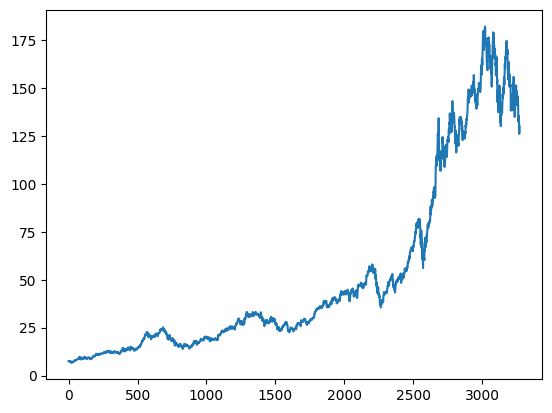

In [6]:
plt.plot(df.Close)

In [7]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3267    150.515600
3268    150.157800
3269    149.764699
3270    149.412100
3271    149.062199
Name: Close, Length: 3272, dtype: float64

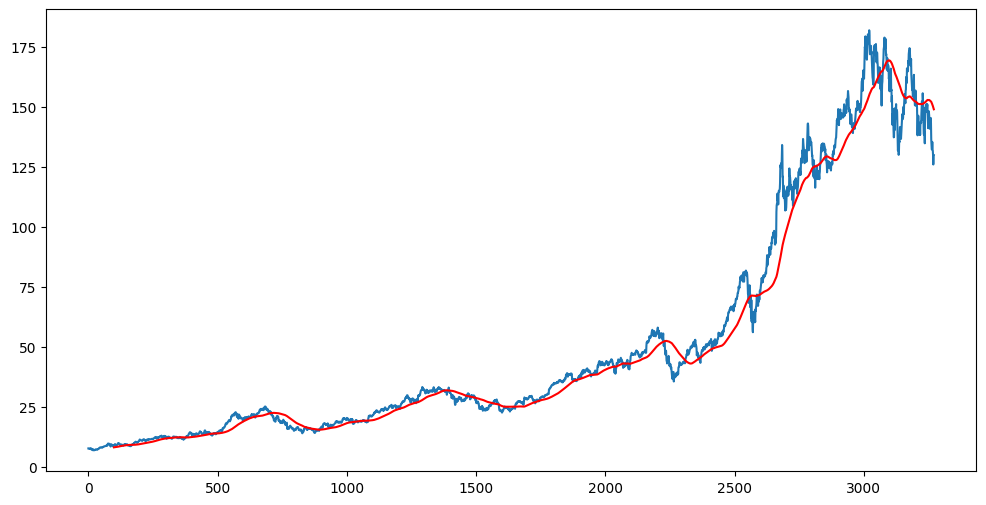

In [8]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [9]:
ma200 = df.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3267    152.1331
3268    152.0096
3269    151.8867
3270    151.7593
3271    151.6110
Name: Close, Length: 3272, dtype: float64

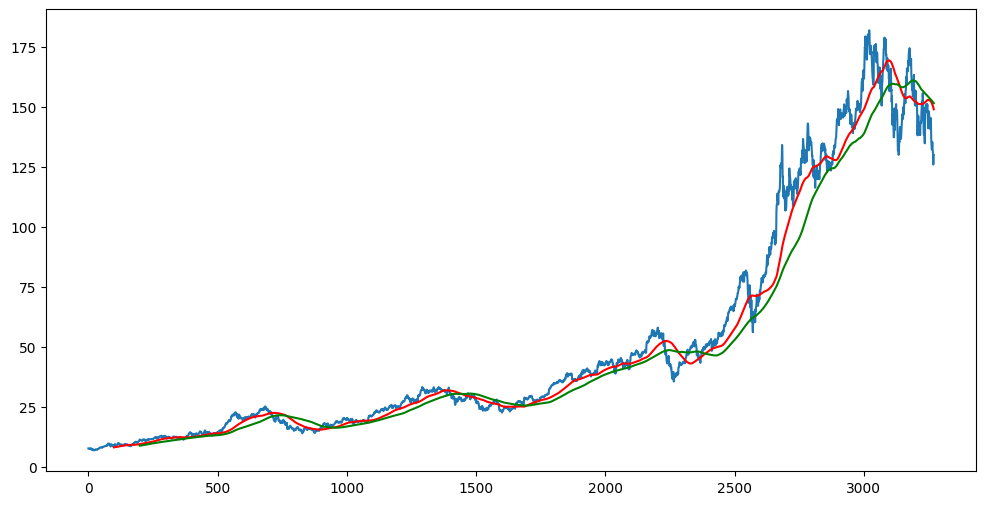

In [10]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [11]:
df.shape

(3272, 5)

In [12]:
# Splitting the data into training and testing set

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2290, 1)
(982, 1)


In [13]:
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_training_array = scaler.fit_transform(data_training)
print(data_training_array)


[[0.01533047]
 [0.01558878]
 [0.01320823]
 ...
 [0.71710501]
 [0.71739828]
 [0.70127194]]


In [15]:
data_training_array.shape

(2290, 1)

In [16]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train)

[[[0.01533047]
  [0.01558878]
  [0.01320823]
  ...
  [0.03819355]
  [0.03711847]
  [0.03634356]]

 [[0.01558878]
  [0.01320823]
  [0.01293595]
  ...
  [0.03711847]
  [0.03634356]
  [0.04279409]]

 [[0.01320823]
  [0.01293595]
  [0.01391331]
  ...
  [0.03634356]
  [0.04279409]
  [0.04525843]]

 ...

 [[0.95983077]
  [0.94624557]
  [0.97234088]
  ...
  [0.67928149]
  [0.67967244]
  [0.70278682]]

 [[0.94624557]
  [0.97234088]
  [0.95978186]
  ...
  [0.67967244]
  [0.70278682]
  [0.71710501]]

 [[0.97234088]
  [0.95978186]
  [0.93065677]
  ...
  [0.70278682]
  [0.71710501]
  [0.71739828]]]


In [17]:
# ML model
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1) ))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [19]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
69/69 [==============================] - 24s 238ms/step - loss: 0.0244
Epoch 2/50
69/69 [==============================] - 18s 266ms/step - loss: 0.0067
Epoch 3/50
69/69 [==============================] - 19s 271ms/step - loss: 0.0052
Epoch 4/50
69/69 [==============================] - 22s 319ms/step - loss: 0.0056
Epoch 5/50
69/69 [==============================] - 20s 291ms/step - loss: 0.0043
Epoch 6/50
69/69 [==============================] - 20s 284ms/step - loss: 0.0053
Epoch 7/50
69/69 [==============================] - 20s 292ms/step - loss: 0.0045
Epoch 8/50
69/69 [==============================] - 20s 286ms/step - loss: 0.0042
Epoch 9/50
69/69 [==============================] - 19s 276ms/step - loss: 0.0037
Epoch 10/50
69/69 [==============================] - 21s 302ms/step - loss: 0.0035
Epoch 11/50
69/69 [==============================] - 19s 271ms/step - loss: 0.0033
Epoch 12/50
69/69 [==============================] - 20s 287ms/step - loss: 0.0040
Epoch 13/50
6

In [20]:
model.save('keras_model.h5')

In [21]:
data_testing.head()

,Close
2290,42.602501
2291,42.357498
2292,42.722500
2293,42.544998
2294,42.700001


In [22]:
past_100_days = data_training.tail(100)

In [23]:
final_df = past_100_days.append(data_testing, ignore_index = True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_28400\3299050086.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


In [24]:
final_df.head()

,Close
0,55.959999
1,54.470001
2,54.560001
3,54.592499
4,55.007500


In [25]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.13937014],
       [0.1291969 ],
       [0.1298114 ],
       ...,
       [0.61785443],
       [0.64222927],
       [0.64441407]])

In [26]:
input_data.shape

(1082, 1)

In [27]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(982, 100, 1)
(982,)


In [28]:
# Making predictions

y_predicted = model.predict(x_test)

31/31 [==============================] - 4s 79ms/step


In [29]:
y_predicted.shape

(982, 1)

In [30]:
y_test

array([0.04816933, 0.04649653, 0.04898865, 0.04777672, 0.04883503,
       0.04818639, 0.04905691, 0.05093454, 0.04927882, 0.05253905,
       0.05468976, 0.05486046, 0.05578219, 0.05284628, 0.05595289,
       0.05745499, 0.05690876, 0.05518478, 0.05173679, 0.05243663,
       0.06266108, 0.06609201, 0.06745755, 0.07090551, 0.07498506,
       0.07822822, 0.0756849 , 0.07846719, 0.09029614, 0.08340019,
       0.07945721, 0.07612869, 0.07899633, 0.07942306, 0.08152257,
       0.08372451, 0.08846975, 0.09073996, 0.09132031, 0.09355637,
       0.09884784, 0.09782367, 0.09973542, 0.09688486, 0.09674831,
       0.0973628 , 0.09739694, 0.10401981, 0.10526585, 0.10640949,
       0.1114449 , 0.1108987 , 0.10768968, 0.1060169 , 0.10654605,
       0.09982077, 0.11663396, 0.11429546, 0.11873346, 0.11315182,
       0.10355893, 0.1036272 , 0.09990612, 0.0938636 , 0.0743023 ,
       0.07932065, 0.08317828, 0.08174448, 0.079901  , 0.06981308,
       0.0758044 , 0.06928394, 0.06395836, 0.06278058, 0.06151

In [31]:
y_predicted

array([[0.11194934],
       [0.11264181],
       [0.11343625],
       [0.11431083],
       [0.11524233],
       [0.11620852],
       [0.11718807],
       [0.11816235],
       [0.11911774],
       [0.12004125],
       [0.12092599],
       [0.12177084],
       [0.12257645],
       [0.12334508],
       [0.124075  ],
       [0.12476784],
       [0.12542793],
       [0.12605825],
       [0.12665838],
       [0.12722191],
       [0.12774304],
       [0.1282319 ],
       [0.12870567],
       [0.12918209],
       [0.12968107],
       [0.13022506],
       [0.13083638],
       [0.13152501],
       [0.13229707],
       [0.133174  ],
       [0.13415843],
       [0.13523488],
       [0.13637488],
       [0.13755211],
       [0.13874152],
       [0.13992345],
       [0.14108524],
       [0.14222601],
       [0.14335129],
       [0.1444673 ],
       [0.14558229],
       [0.14671183],
       [0.14786552],
       [0.14905071],
       [0.1502632 ],
       [0.1514928 ],
       [0.15272675],
       [0.153

In [32]:
y_predicted = scaler.inverse_transform(y_predicted)
y_test = y_test.reshape(-1,1)
y_test = scaler.inverse_transform(y_test)

<function matplotlib.pyplot.show(close=None, block=None)>

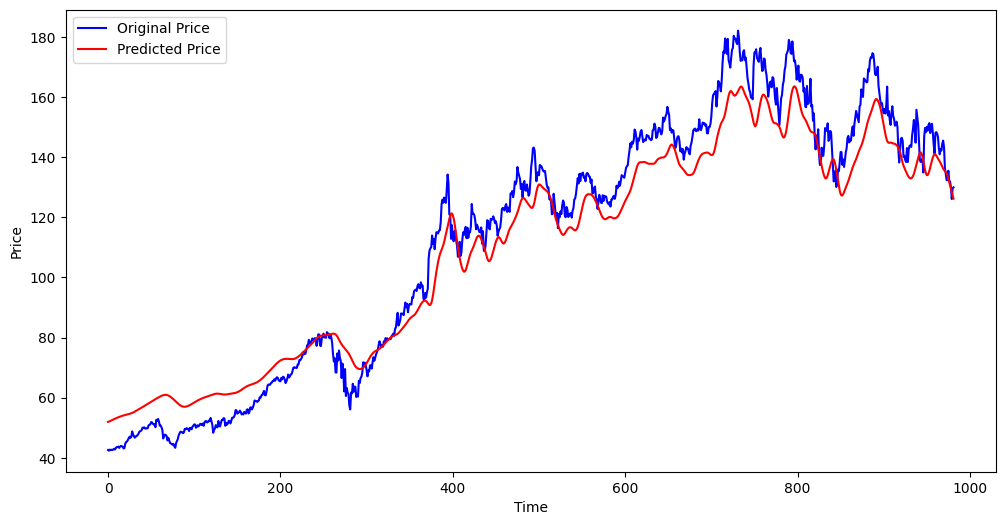

In [33]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show

In [38]:
import math
from sklearn.metrics import mean_squared_error

In [39]:
math.sqrt(mean_squared_error(y_test,y_predicted))

9.62911571547772